## <a id='toc1_1_'></a>[Банки — Анализ оттока клиентов](#toc0_)

### <a id='toc1_1_1_'></a>[Описание проекта "Банки — Анализ оттока клиентов"](#toc0_)

**Цели и задачи исследования:**

- выделить отточные сегменты, составить их портреты
- дать рекомендации по уменьшению оттока "проблемных" сегментов
- по возможности "написать модель для прогнозирования ухода клиента из банка"

**Описание датасетов**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

**План исследования:**
1. Первичное знакомство с данными, загрузка библиотек  
   Загрузить нужные библиотеки (по необходимости). После подгрузить датасет, изучить данные и провести первичный анализ. 


2. Предобработка  
   Проверить данные на пропуски(разобраться в причинах) и дубликаты. Переименовать столбцы (при необходимости). Подготовить данные для анализа, проверить на выбросы и ошибки. "Подбить" данные под нужные тип и формат. 


3. Исследовательский анализ данных  
   Посмотреть разные срезы данных, посмотреть на корреляции. Построить нужные для анализа графики и схемы. Подготовить срезы данных для дальнейшей работы.


4. Выделение отточных сегментов  
   Выделить отточный сегмент. Категоризировать отточный сегмент на основе анализа. Найти закономерности и разобраться в причинах по каждой категории.


5. Статистическая проверка гипотез  
   На основе статестических критериев (таких как: T, Z, U), проверить несколько гипотез (напрм."Гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались")


6. Выводы и рекомендации  
   Написать выводы исходя из целей и задач. Сформулировать рекомендации.



### <a id='toc1_1_2_'></a>[Загрузка библиотек и объявление "кастомных" функций](#toc0_)

In [1]:
!pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from IPython.core.display import display, HTML

from statsmodels.graphics.gofplots import qqplot
from scipy import stats

import warnings
warnings.simplefilter('ignore')

import phik


In [3]:
# принимает:
# 'dfs' - список с таблицами
# 'captions' - подписи к таблицам
# 'space_width' - отступы между таблицами

# возвращает:
# выводит в консоль таблицы рядом с друг другом

def display_side_by_side(dfs: list, captions: list, gradient=False, space_width=10):
    output = ""
    combined = dict(zip(captions, dfs))
    if (gradient == True):
        for caption, df in combined.items():
            output += (df.style.set_properties(**{'text-align': 'left'}).background_gradient('YlGnBu')
                       .set_table_attributes("style='display:inline'")
                       .set_caption(caption)._repr_html_())
            output += "\xa0" * space_width
    else:
        for caption, df in combined.items():
            output += (df.style.set_properties(**{'text-align': 'left'})
                       .set_table_attributes("style='display:inline'")
                       .set_caption(caption)._repr_html_())
            output += "\xa0" * space_width
            
    display(HTML(output))


In [4]:
def norm_test(data, alpha = 0.05):
    fig = plt.figure(figsize=(12, 4))
    
    ax = fig.add_subplot(1, 2, 1)
    sns.distplot(data,ax=ax)

    ax = fig.add_subplot(1, 2, 2)
    qqplot(data, line='s', ax=ax)
    plt.show()

    # stat, p  = stats.kstest(data, 'norm')
    # print(f'Kolmogorov-Smirnov Test: stat = {stat:.3}, p = {p:.3}')
    # if p > alpha:
    #     print('Данные распределены нормально')
    # else:
    #     print('Данные не распределены нормально')
    

    stat, p = stats.shapiro(data)
    print(f'\nShapiro-Wilk Test: stat = {stat:.3}, p = {p:.3}')
    if p > alpha:
        print('Данные распределены нормально')
    else:
        print('Данные не распределены нормально')
        
    stat, p = stats.normaltest(data)
    print(f'\nD\'Agostino Test: stat = {np.round(stat,3)}, p = {np.round(p,3)}')
    if p > alpha:
        print('Данные распределены нормально')
    else:
        print('Данные не распределены нормально')
        

### <a id='toc1_1_3_'></a>[Первичное знакомство с данными](#toc0_)

Для начала загрузим датасет и выведем его на экран для ознакомления.

In [5]:
df = pd.read_csv('datasets/bank_dataset.csv')

In [6]:
df.sample(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
1363,15831831,775,Рыбинск,М,30,4,NaN,2,0,1,57461.13,0
1918,15786841,768,Ярославль,Ж,28,3,109118.05,2,0,1,50911.41,0
1646,15694269,570,Ростов Великий,Ж,50,5,129293.74,1,1,0,177805.44,1
4329,15796098,748,Рыбинск,М,60,3,NaN,2,1,1,78194.37,0
1082,15706174,688,Рыбинск,М,36,0,89772.30,1,1,0,177383.68,1


Посмотрим на общую информацию о датасете.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Промежуток кредитного рейтинга `score` от 350 до 850.

Промежуток возраста `Age` от 18 до 92. С нижней планкой все хорошо, клиентов моложе 18 обычно банки не обслуживают. Верхняя высоковата, но в целом 92 года реальный возраст.

`Objects` количество объектов от 0 до 10

`Products` минимальное значение 1, все верно.

`estimated_salary` очень маленькое минимальное значение всего 11.5 нужно будет ниже проверить это. С верхней границей все хорошо.

`Balance` много пропусков.

Остальные поля в порядке.


In [9]:
len(df['userid'].unique())

10000

Видно что:
- `CreditCard`, `Loyalty` и `Churn` являются логическими
- `userid` идентификатор пользователя (уникальные)
- `City` и `Gender` качественные данные
- остальные колонки количественными

Посмотрим на распределения количественных данных.

In [10]:
# columns = ['score','Age','Balance','estimated_salary','Products','Objects','CreditCard','Loyalty','Churn']
col = ['score','Age','Objects','Balance','Products','CreditCard','Loyalty','estimated_salary','Churn']

count = 0
rows = 3
cols = 3

fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Score Distribution','Balance Distribution','Loyalty Distribution',
                                    'Age Distribution', 'Products Distribution','Estimated Salary Distribution',
                                    'Objects Distribution','Credit Card Distribution','Churn Distribution'))

for i in range(1, cols+1):
    for j in range(1, rows+1):
        fig.append_trace(go.Histogram(x=df[col[count]]),row=j, col=i)
        count = count+1

fig.update_layout(
    template='plotly_dark',
    height=800,
    showlegend=False,
    bargap=0.1
)

fig.show()


#### <a id='toc1_1_3_1_'></a>[Вывод](#toc0_)
Датаест содержить информацию о пользователях банка. На первый взгляд проблемными колонками являются: 
- `balance` - есть пропуски
- `score` - большие значения явно упираются в 850 (скорее всего все значения что были выше 850, опустили до 850)
- `estimated_salary` - очень странное распределение ЗП

В остальных колонках на первый взгляд проблем нет. Ошибочных данных тоже сейчас не видно, не считая `score` и `estimated_salary`, можно предположить, что это связано с "синтетическим заполнением данных".

Нужно провести предобработку и разобраться в пропусках в `balance`. 

### <a id='toc1_1_4_'></a>[Предобработка данных](#toc0_)

#### <a id='toc1_1_4_1_'></a>[Приведем название колонок в змеиный регистр](#toc0_)

In [11]:
print(f'Old columns name: {df.columns.to_list()}')

df.rename(columns={'userid': 'user_id', 'CreditCard': 'Credit_Card'}, inplace=True)
df.columns = [c.lower().replace(' ','_') for c in df.columns]

print(f'New columns name: {df.columns.to_list()}')

Old columns name: ['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance', 'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn']
New columns name: ['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']


#### <a id='toc1_1_4_2_'></a>[Приведем данные к правильному типу:](#toc0_)
- `сredit_сard`, `loyalty` и `сhurn` к логическому 
- `gender` заменим русские (`м` и `ж`) обозначения пола на англ (`m` и `w`) для дальнейшего удобства


In [12]:
for col in ['credit_card','loyalty','churn']:
    df[col] = df[col].astype('bool') 

In [13]:
df['gender'] = df['gender'].replace({'Ж':'w', 'М': 'm'})

In [14]:
display(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  bool   
 9   loyalty           10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


None

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
3672,15749640,750,Ярославль,m,43,6,113882.31,1,True,True,74564.41,False
2880,15832161,694,Ростов Великий,w,37,8,98218.04,2,True,False,182354.46,True
115,15718258,628,Ростов Великий,w,30,9,132351.29,2,True,True,74169.13,False


#### <a id='toc1_1_4_3_'></a>[Проверим поле `estimated_salary`](#toc0_)

In [15]:

fig = px.histogram(df.query('estimated_salary < 30_000'), x="estimated_salary")

fig.update_layout(
    template='plotly_dark',
    height=400,
    showlegend=False,
    bargap=0.2)

fig.show()

Данные по зарплатам равномерно распределены от 0 до 30_000. Что говорит о том, что это данные скорее всего были синтетически добавлены в датасет. А значит удалять "экстремально" низкие ЗП нет смысла.

#### <a id='toc1_1_4_4_'></a>[Посмотрим на пропуски и дубликаты.](#toc0_)

In [16]:
display(
    pd.DataFrame(round(df.isna().mean().sort_values()*100,)).style.background_gradient('YlGnBu')
)
print(f'Count of duplicates: {df.duplicated().sum()}')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
objects,0.000000
products,0.000000
credit_card,0.000000
loyalty,0.000000
estimated_salary,0.000000


Count of duplicates: 0


Попробуем разобраться в пропусках в поле `balance`

In [17]:
balance_nan = df.query('balance != balance')
balance_nan.sample(3)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
5518,15621111,628,Ярославль,m,39,6,NaN,2,False,False,134441.60,False
5937,15739771,740,Рыбинск,w,31,8,NaN,2,False,False,86657.48,False
2792,15785556,535,Ярославль,w,45,2,NaN,2,False,True,170621.55,False


Рассмотрим распределение данных с пропусками в балансе и без.

In [18]:
col = ['score','age','gender','estimated_salary','products','objects','credit_card','loyalty','churn']

count = 0
rows=3
cols=3

fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=('Score Distribution','Estimated Salary Distribution','Credit Card Distribution',
                                    'Age Distribution', 'Products Distribution','Loyalty Distribution',
                                    'Gender Distribution','Objects Distribution','Churn Distribution'))

for i in range(1, cols+1):
    for j in range(1, rows+1):
        fig.append_trace(go.Histogram(x=df.query('balance == balance')[col[count]], marker_color='#6146FF'),row=j, col=i)
        fig.append_trace(go.Histogram(x=balance_nan[col[count]], marker_color='#FF2931'),row=j, col=i)
        count = count+1

fig.update_layout(
    template='plotly_dark',
    height=800,
    showlegend = False
)

fig.show()


In [19]:
fig = make_subplots(rows=1, cols=1)

fig.append_trace(go.Histogram(x=df.query('balance == balance')['city'], marker_color='#6146FF'),row=1, col=1)
fig.append_trace(go.Histogram(x=balance_nan['city'], marker_color='#FF2931'),row=1, col=1)

fig.update_layout(
    template='plotly_dark',
    height=400,
    showlegend=False,
    title='City Distribution by "nan balance" & "no nan balance"'
)

fig.show()

По всем данным явных различий в распределениях нет, кроме поля `city` тут видно, что в "Ростов Великий" нет пользователей с пропусками баланса.

#### <a id='toc1_1_4_5_'></a>[Добавим новые столбцы (категоризируем):](#toc0_)
- `score` -> `score_cat`
- `age` -> `age_cat`
- `balance` -> `balance_cat`
- `estimated_salary` -> `estimated_salary_cat`
- `gender` -> `gender_digit`

##### <a id='toc1_1_4_5_1_'></a>[Категоризация по ПКР](#toc0_)

В России диапазоны ПКР выглядят так:
- Низкая 1–149
- Средняя 150-593
- Высокая 594-903
- Очень высокая 904-999

Но для наших данных они не очень подходят, попробуй разбить на категорий через процентели.

In [20]:
print(f"First percentile: { np.percentile(df['score'], 40)}")
print(f"Second percentile: { np.percentile(df['score'], 70)}")

First percentile: 627.0
Second percentile: 704.0


Разобьем на следующие категории:
- 000 < низкий < 600
- 600 < средний < 700
- 700 < высокий 

In [21]:
def score_categorization(df):
    
    if df['score'] < 600:
        return 'low'
    elif df['score'] < 700:
        return 'middle'
    else:
        return 'hight'

df['score_cat'] = df.apply(score_categorization, axis=1)

##### <a id='toc1_1_4_5_2_'></a>[Категоризация по возрасту](#toc0_)
В России выделяют следующие категории:
- «молодежью» — лица от 15 до 24 лет
- «лицами трудоспособного возраста» — лица от 25 до 64 лет
- «пожилыми людьми» — лица 65 лет и старше
  
Для наших данных немного поменяем:
- 18 < `18-24` < 25
- 25 < `25-44` < 45
- 45 < `45-64` < 65
- 65 < `65+`

In [22]:
def age_categorization(df):
    
    if df['age'] < 25:
        return '18-24'
    elif df['age'] < 45:
        return '25-44'
    elif df['age'] < 65:
        return '45-64'
    else:
        return '65+'

df['age_cat'] = df.apply(age_categorization, axis=1)

##### <a id='toc1_1_4_5_3_'></a>[Категоризация по балансу на счете](#toc0_)

Разобьем на след. категории:
- до 50_000
- до 100_000
- до 150_000
- от 200_000

In [23]:
def age_categorization(df):
    
    if df['balance'] !=  df['balance']:
        return np.nan
    elif df['balance'] < 50_000:
        return '0. less 50_000'
    elif df['balance'] < 100_000:
        return '1. 50_000 - 100_000'
    elif df['balance'] < 150_000:
        return '2. 100_000 - 150_000'
    else:
        return '3. more 200_000'

df['balance_cat'] = df.apply(age_categorization, axis=1)

##### <a id='toc1_1_4_5_4_'></a>[Категоризация по уровню дохода](#toc0_)

Для региональных клиентов выделим следующие категории:
- низкий 50_000 <
- средний 100_000 <
- высокий 100_000 +

In [24]:
def score_categorization(df):
    if df['estimated_salary'] < 50_000:
        return 'low'
    elif df['estimated_salary'] < 100_000:
        return 'middle'
    else:
        return 'hight'

df['estimated_salary_cat'] = df.apply(score_categorization, axis=1)

##### <a id='toc1_1_4_5_5_'></a>[Поле с цифровым обозначение пола клиента](#toc0_)

Для просмотра корреляций добавим поле с цифровым обозначением пола:
- `woman` -> `0`
- `man` -> `1`

In [25]:
def age_digitalization(df):
    if df['gender'] == 'w':
        return 0
    else:
        return 1

df['gender_digit'] = df.apply(age_digitalization, axis=1)

In [26]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Score categorization','Age categorization',
                                    'Balance categorization','Estimated Salary categorization'))

fig.append_trace(go.Histogram(x=df['score_cat']),row=1, col=1)
fig.append_trace(go.Histogram(x=df['age_cat']),row=1, col=2)
fig.append_trace(go.Histogram(x=df['balance_cat']),row=2, col=1)
fig.append_trace(go.Histogram(x=df['estimated_salary_cat']),row=2, col=2)

fig.update_layout(
    template='plotly_dark',
    height=600,
    showlegend=False)

fig.show()

#### <a id='toc1_1_4_6_'></a>[Вывод](#toc0_)
На этапе предобработки было сделано:
- переименованы столбцы в змеиный регистр
- данные приведены к верным типам
- дубликатов нет
- явных выбросов или ошибок нет
- пропуски только в поле `balance`
- странные значения в `estimated_salary` (особенно по нижней планке)
- добавили новые столбцы с категоризацией (`score_cat`, `age_cat`, `balance_cat`, `estimated_salary_cat`, `gender_digit`)
  
Скорее всего `estimated_salary` просто равномерно заполнено от о до 200к, т.е. этот столбец "синтетически" заполнен, следовательно исключать данные по нему нет смысла.

Проанализировав пропуски в `balance`, точную причину по предоставленным данным установить нельзя, так как в целом ни одно из полей "без пропусков баланса" и с "пропусками баланса" не выделяется, исключение только поле `city` по нему в городе `Ростов Великий` нет пропусков в балансе. Можно только предположить откуда взялись эти пропуски:
- техническая ошибка при заполнение данных или при выгрузке
- возможно это поле показывает отрицательный баланс на счете
- возможно эти клиенты были перенесены из старой базы

Вариантов можно быть много, но точный ответ дать по этому датасету нельзя.

### <a id='toc1_1_5_'></a>[Исследовательский анализ](#toc0_)

- построим общую матрицу корреляций, что бы понять какие поля нас интересуют больше всего
- изучим интересующие признаки и составим портрет `среднего` клиента
- подготовим все для составления портретов и категоризации отточных клиентов 

#### <a id='toc1_1_5_1_'></a>[Общая матрица корреляций](#toc0_)

In [27]:
df_corr = df[['score', 'gender_digit', 'age', 'objects', 'balance','products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']].corr()
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )

fig.update_layout(
    template='plotly_dark',
    height=500,
    showlegend = True,
    title='Correlation matrix'
)

fig.show()

In [28]:
df_corr = (
    pd.merge(df, pd.get_dummies(pd.Series(list(df['city']))), left_index=True, right_index=True)[
        ['score','Ростов Великий', 'Рыбинск', 'Ярославль', 'gender_digit', 'age', 'objects',
         'balance','products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']
        ].phik_matrix()
)

interval columns not set, guessing: ['score', 'Ростов Великий', 'Рыбинск', 'Ярославль', 'gender_digit', 'age', 'objects', 'balance', 'products', 'estimated_salary']


In [29]:
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )

fig.update_layout(
    template='plotly_dark',
    height=500,
    showlegend = True,
    # title='Correlation matrix'
)

fig.show()

Общая матрица корреляций (самая важная первая строка) мало о чем говорит, очень явных корреляций между какими-то полями не видно, за исключением:
- корреляция между `age` и `churn` составляет почти 30%
- корреляция между `gender` и `churn` составляет почти 10%, это слабый показатель, но на графике распределений видно, что нужно продолжить анализ в данном направлении
- корреляция между `loyalty` и `churn` составляет почти 15%, даже без графиков эти показатели очевидно должны быть связаны, но эта связь слабая, посмотрим что покажет более подробный анализ

#### <a id='toc1_1_5_2_'></a>[Проанализируем интересующие признаки и составим портрет `среднего` клиента](#toc0_)

Отталкиваться будем от следующих полей:
- `score_cat`
- `city`
- `gender` и `age_cat` будем рассматривать в связке
- `objects`
- `balance_cat`
- `products`
- `credit_card`
- `loyalty`
- `estimated_salary_cat`

Поле `churn` пока трогать не будем, на данном этапе важно понять, "кто такие клиенты банка". А в следующем уже найдем портреты и категории отточных пользователей.

Для начала посмотрим на графики распределений по каждому интересующему полю, а потом посмотрим как они между собой соотносятся.

In [30]:
col = ['score_cat','city','objects','balance_cat', 'products','credit_card','loyalty','estimated_salary_cat']

count = 0
rows=2
cols=4

fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=('Score Cat. Distribution','Objects Distribution','Products Distribution','Loyalty Distribution',
                                    'City Distribution', 'Balance Cat. Distribution','Credit Card Distribution','Estimated salary Cat. Distribution'))

for i in range(1, cols+1):
    for j in range(1, rows+1):
        fig.append_trace(go.Histogram(x=df[col[count]]),row=j, col=i)
        count = count+1

fig.update_layout(
    template='plotly_dark',
    height=800,
    showlegend = False,
    bargap=0.2
)

fig.show()


In [31]:
fig = px.histogram(df.groupby(['gender','age_cat'],as_index=False).agg(count = ('age_cat','count')).sort_values('count',ascending=False),
                   x="age_cat",
                   y="count",
                   color='gender',
                   barmode='group'
                   )
fig.update_layout(
    template = 'plotly_dark',
    height = 500,
    showlegend = True,
    title = 'Distribution of age category cafes by gender',
    xaxis_title = 'age category',
    yaxis_title = 'clients count',
    legend_title = 'Gender'
    )
fig.show()


По графикам можно построить следующий портрет `среднего пользователя`:
- средний кредитный рейтинг
- от 2 до 9 объектов собственности
- 1 или 2 банковских продукта
- живет в Ярославле
- на балансе от 100_000 до 150_000
- скорее всего есть кредитная карта
- заработок выше среднего
- скорее всего мужчина в возрастном промежутке от 25 до 44 лет

По лояльности к банку все клиенты разделены практически поровну.

#### <a id='toc1_1_5_3_'></a>[Вывод](#toc0_)

По анализировав матрицу корреляций, стало ясно что сильных корреляций между признаками нет, а те "слабые" что есть относятся к признаком "отточных" клентов.
Так же был составлен и описан `портрет среднего пользователя`.

Теперь узнав получше пользователей банка, можно выделить категорий и сегменты отточных клиентов.

### <a id='toc1_1_6_'></a>[Выделение отточных сегментов](#toc0_)

- посмотрим на все признаки разделив весь дата сет на 2 группы (отточные клиенты и нет)
- посмотрим внимательно на признаки которые вызывают вопросы
- проанализируем признаки которые явно выбивались на этапах выше
- подготовим все для составления портретов и категоризации отточных клиентов
- постараемся выяснить по каким причинам уходят пользователе и что можно улучшить

#### <a id='toc1_1_6_1_'></a>[Рассмотрим все признаки разделив весь дата сет на 2 группы (отточные клиенты и не отточные)](#toc0_)

In [32]:
df_not_lost = df.query('churn == 0')
df_lost = df.query('churn == 1')

In [33]:
col = ['city','gender','age_cat','objects','balance_cat','products','credit_card','loyalty','estimated_salary_cat']

count = 0
rows=3
cols=3

fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=('City Distribution','Objects Distribution','Credit Card Distribution',
                                    'Gender Distribution', 'Balance Distribution','Loyalty Distribution',
                                    'Age Distribution','Products Distribution','Estimated Salary Distribution'))

for i in range(1, cols+1):
    for j in range(1, rows+1):
        fig.append_trace(go.Histogram(x=df_not_lost[col[count]], marker_color='#6146FF'),row=j, col=i)
        fig.append_trace(go.Histogram(x=df_lost[col[count]], marker_color='#FF2931'),row=j, col=i)
        count = count+1

fig.update_layout(
    template='plotly_dark',
    height=800,
    showlegend = False
)

fig.show()


По графикам и матрице хорошо видно, на что стоит обратить внимание в дальнейшем анализе:
- поля `city`, `estimated_salary` и `credit_card` нужно внимательнее изучить и посмотреть на относительное число отточных клиентов
- поля `gender`, `balance`, `loyalty`, `age` и `products` даже при таком поверхностном анализе сразу выделяются, видно что в них есть перегибы отточных клиентов
- поле `objects` можно дальше не рассматривать как критерий для оттока так как распределения между двумя группами почти не отличаются

#### <a id='toc1_1_6_2_'></a>[Проверим поля `city`, `estimated_salary`, score_cat и `credit_card`](#toc0_)
Посмотрим на эти поля по двум группам в относительных значениях.

In [34]:
display_side_by_side([
    df.pivot_table(index='credit_card',values='churn',aggfunc='mean'),
    df.pivot_table(index='estimated_salary_cat',values='churn',aggfunc='mean'),
    df.pivot_table(index='city', values='churn', aggfunc='mean'),
    df.pivot_table(index='score_cat', values='churn', aggfunc='mean')
    ],
                     [
    'Churn by own credit card',
    'Churn by estimated salary category',
    'Churn by city',
    'Churn by score_cat'
    ], gradient=True)

,churn
credit_card,
False,0.208149
True,0.201843
,churn
estimated_salary_cat,
hight,0.208383
low,0.199348
middle,0.198660
,churn
city,


Видно что владение `кредитной карты` и `доход клиента` практические не влиеяет на количество отточных клиентов. 

А по `городу` наоборот хорошо видно что:
- больше всего отточных клиентов в "Ростове Великом"
- а в "Рыбинске" и "Ярославле" в 2 раза меньше

#### <a id='toc1_1_6_3_'></a>[Проанализируем отобранные выше признаки чтобы выделить отточные сегменты](#toc0_)

In [35]:
display_side_by_side([
        pd.DataFrame(df.groupby('loyalty').agg('mean')['churn']*100),
        pd.DataFrame(df.groupby('age_cat').agg('mean')['churn']*100),
        pd.DataFrame(df.groupby('gender').agg('mean')['churn']*100),
        pd.DataFrame(df.groupby('city').agg('mean')['churn']*100),
        pd.DataFrame(df.groupby('products').agg('mean')['churn']*100)
        ],[
        'loyalty',
        'age_cat',
        'gender',
        'city',
        'products'
    ], gradient=True)

,churn
loyalty,
False,26.850897
True,14.269074
,churn
age_cat,
18-24,8.752735
25-44,13.230598
45-64,48.639456
65+,15.248227
,churn


Для начала посмотрим на самые явные признаки (по матрице корреляций) `age_cat` и `gender`

In [36]:

pt_city_cc = df.pivot_table(
    index='age_cat',
    columns='gender',
    values='churn',
    aggfunc=['mean', 'count']
)
pt_city_cc['mean'] = round(pt_city_cc['mean']*100, 2)

z = np.array(pt_city_cc['mean'])

fig = go.Figure(data=go.Heatmap(
    z=z,
    x=['man', 'woman'],
    y=list(pt_city_cc['mean'].index),
    text=pt_city_cc['mean'].astype(
        str) + '%      Count: ' + pt_city_cc['count'].astype(str),
    texttemplate="%{text}",
    colorscale='Viridis'
)
)

fig.update_layout(
    template='plotly_dark',
    height=400,
    margin=dict(pad=10),
    title='Lost clients by gender and age category'
)
fig.update_traces(showscale=False)

# fig.update_layout({
#     'plot_bgcolor': 'rgba(0, 0, 0, 0)',
#     'paper_bgcolor': 'rgba(0, 0, 0, 0)',
# })

fig.show()


На графике отлично видно, какие категории клиентов боле склонны к уходу из банка:
- `женщины в возрастном промежутке 45-64`, больше половины клиентов данной категорий отточные
- `мужчины в возрастном промежутке 45-64`, более 40% клиентов данной категорий отточные
- `женщины в возрастном промежутке 65+`, почти 20% клиентов данной категорий отточные
- `женщины в возрастном промежутке 25-44`, более 15% клиентов данной категорий отточные

В целом по графику можно сказать, что в относительных числах клиенты `женского` пола данного банка, больше склонны к оттоку.

Далее посмотрим на отток клиентов:
- по `лояльности` и `количеству банковский продуктов`
- по `лояльности` и `категориям на балансе`
  
Для примера выведем сводную талицу с процентом отточных клиентов по лояльности. Но рассматривать поле `лояльности` (активность клиентов за последний месяц) в отрыве от других параметров нет смысла, так как это не дает понимания что именно нужно улучшать для уменьшения оттока клиентов.

In [37]:
display_side_by_side([
        pd.DataFrame(df.groupby('loyalty').agg('mean')['churn']*100),
        pd.DataFrame(df.query('balance != balance').groupby('loyalty').agg('mean')['churn']*100),
        pd.DataFrame(df.query('balance == balance').groupby('loyalty').agg('mean')['churn']*100)
        ],[
        'Churn for all clients by loyalty',
        'Churn clients without balance by loyalty',
        'Churn clients with balance by loyalty'
    ], gradient=True)

,churn
loyalty,
False,26.850897
True,14.269074
,churn
loyalty,
False,18.348624
True,9.610251
,churn
loyalty,
False,31.626409


In [38]:

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('By loyalty and products', 'By loyalty and balance cat.'))
pt_city_cc = df.pivot_table(
    index='products',
    columns='loyalty',
    values='churn',
    aggfunc=['mean', 'count']
)
pt_city_cc['mean'] = round(pt_city_cc['mean']*100, 2)

z = np.array(pt_city_cc['mean'])
x = ['Don\'t loyalty', 'Do loyalty']

fig.append_trace(go.Heatmap(
    z=z,
    x=x,
    y=['1 product', '2 products', '3 products', '4 products'],
    text=pt_city_cc['mean'].astype(
        str) + '%      Count: ' + pt_city_cc['count'].astype(str),
    texttemplate="%{text}",
    colorscale='Viridis'
), row=1, col=1)

pt_city_cc = df.pivot_table(
    index='balance_cat',
    columns='loyalty',
    values='churn',
    aggfunc=['mean', 'count']
)
pt_city_cc['mean'] = round(pt_city_cc['mean']*100, 2)
z = np.array(pt_city_cc)

fig.append_trace(go.Heatmap(
    z=z,
    x=x,
    y=['less 50k', '50k - 100k', '100k - 150k', 'more 200k'],
    text=pt_city_cc['mean'].astype(
        str) + '%      Count: ' + pt_city_cc['count'].astype(str),
    texttemplate="%{text}",
    colorscale='Viridis'
), row=1, col=2)
fig.update_layout(
    template='plotly_dark',
    height=400,
    showlegend=False,
    margin=dict(pad=10),
    title='Lost clients'
)

# fig.update_layout({
#     'plot_bgcolor': 'rgba(0, 0, 0, 0)',
#     'paper_bgcolor': 'rgba(0, 0, 0, 0)',
# })

fig.update_traces(showscale=False)
fig.show()


In [39]:
print(f"""Средний отток пользователей по всем категориям вкладов (исключая пропуски):
{sum(list(df.groupby('balance_cat').agg('mean')['churn']))/len(df.groupby('balance_cat').agg('mean')['churn']):.2%}
      """)

Средний отток пользователей по всем категориям вкладов (исключая пропуски):
25.86%
      


По графику `лояльности и кол-ву продуктам`:
- 100% отток у клиентов с `4 продуктами не зависимо от лояльности` (но выборка очень маленькая, поэтому серьезно в этому относиться не стоит)
- огромный отточный процент у клиентов с `3 продуктами`, `не зависимо от лояльности` (но снова выборка очень маленькая)
- но в целом можно сказать что `есть тенденция на оттток клиентов в не зависимости от лояльности с большим кол-вом продуктов`
- почти 40% отток у клиентов `без лояльности` и имеющим `1 продукт`
- почти 20% у `лояльных` клиентов с `1 продуктом`
- самый малый отток у клиентов с `2 продуктами`, 10% и 5% 
  
По графику `лояльности и балансу`(в балансе много пропусков, но общие выводы сделать можно):
- интересное наблюдение количество отточных клиентов `с пропусками в балансе` почти в 2 раза меньше чем клинтов `без пропусков` в независимости от `лояльности`
- в независимости `от суммы баланса`, отток `не лояльных` клиентов очень высокий от 27% до 51% (корреляции чем больше сумма на балансе тем меньше отток нет)
- у `лояльных` клиентов картина схожая процент отточных клиентов тут сильно меньше, но по графику видно что нет прямой зависимости между уходом и суммы баланса

По итогу можно сказать следующее:
- `лояльность` сильно влияет на отток клиентов 
- хорошо видно корреляцию `количество продуктов` и `лояльности` отточных клиентов (золотая середина жто 2 продукта как для лояльных так и не лояльных)
- явного влияния `суммы баланса` на отток клиентов в не зависимости от `лояльности` нет
- средний процент оттока по всем `категориям баланса` около 25%
- отточных клиентов с `пропусками баланса почти` в 2 раза меньше чем без пропусков

Последнее поля для анализа `city`. 

Посмотрим на него в разрезе `loyalty`, `gender` и `age_cat`.

In [40]:

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('By city and gender', 'By city and age_cat',
                                    'By city and loyalty', 'By city and products'))

pt_city_cc = df.pivot_table(
    index='gender',
    columns='city',
    values='churn',
    aggfunc='mean'
)


fig.append_trace(go.Heatmap(
    z=np.array(pt_city_cc),
    x=list(pt_city_cc.columns),
    y=list(pt_city_cc.index),
    text=np.round(pt_city_cc*100, 2),
    texttemplate="%{text} %",
    colorscale='Viridis'
), row=1, col=1)

pt_city_cc = df.pivot_table(
    index='age_cat',
    columns='city',
    values='churn',
    aggfunc='mean'
)

fig.append_trace(go.Heatmap(
    z=np.array(pt_city_cc),
    x=list(pt_city_cc.columns),
    y=list(pt_city_cc.index),
    text=np.round(pt_city_cc*100, 2),
    texttemplate="%{text} %",
    colorscale='Viridis'
), row=1, col=2)

pt_city_cc = df.pivot_table(
    index='loyalty',
    columns='city',
    values='churn',
    aggfunc='mean'
)


fig.append_trace(go.Heatmap(
    z=np.array(pt_city_cc),
    x=list(pt_city_cc.columns),
    # y=list(pt_city_cc.index),
    y = ['Don\'t loyalty', 'Do loyalty'],
    text=np.round(pt_city_cc*100, 2),
    texttemplate="%{text} %",
    colorscale='Viridis'
), row=2, col=1)

pt_city_cc = df.pivot_table(
    index='products',
    columns='city',
    values='churn',
    aggfunc='mean'
)

fig.append_trace(go.Heatmap(
    z=np.array(pt_city_cc),
    x=list(pt_city_cc.columns),
    y=list(pt_city_cc.index),
    text=np.round(pt_city_cc*100, 2),
    texttemplate="%{text} %",
    colorscale='Viridis'
), row=2, col=2)

fig.update_layout(
    template='plotly_dark',
    height=600,
    showlegend=False,
    margin=dict(pad=10),
    title='Lost clients'
)

# fig.update_layout({
#     'plot_bgcolor': 'rgba(0, 0, 0, 0)',
#     'paper_bgcolor': 'rgba(0, 0, 0, 0)',
# })

fig.update_traces(showscale=False)
fig.show()


По графикам с разбивкой по городам и другим критериям можно сказать что:
- самый большой сегмент отточных клиентов в `Ростове Великом`
- в `Рыбинске` и `Ярославле` отток примерно одинаковый
- во `всех городах` большую часть отточных клиентов составляют `женщины`
- в `Ростове Великом` процент оттока `мужчин` тоже очень высокий
- подтверждая выводы выше, большую часть отточных клиентов в `Рыбинске` и `Ярославле` составляют люди в `возрасте 45-64`
- в `Ростове Великом` отток `во всех возрастных категориях`, кроме 18-24 очень высокий особенно в `возрасте 45-64` и `пенсионеры`
- отточных и `лояльных` клиентов `во всех городах` в 2 раза меньше чем `не лояльных`
- по `количеству продуктов` ситуация схожая с выше описанной

#### <a id='toc1_1_6_4_'></a>[Выводы](#toc0_)
Проанализировав сегмент отточных клиентов теперь можно выделить основные 5 категории:

1. Не зависимо от `города, лояльности, баланса и количества продуктов` самой проблемной категорией являются 
   - женщины в возрасте` 45 - 64 года`
2. Следом идут клиенты из `Ростова Великого`:
   - как `женщины` так и `мужчины `
   - начиная `с 25 до 64 лет`
3. Не лояльные клиенты во всех категориях уходят в 2 раза чаще (очевидная группа)
4. Клиенты с `количеством продуктов` (скорее всего прямая зависимость от `лояльности`):
   - меньше 2 шт
   - больше 2 шт
5. Клиенты со `вкладами` меньше 50к (скорее всего прямая зависимость от `лояльности`)

Это основные 5 категорий отточных клиентов. О причинах и рекомендациях в финальном выводе.

### <a id='toc1_1_7_'></a>[Статистическая проверка гипотез](#toc0_)
На основе статестических критериев (таких как: T, Z, U), проверить несколько гипотез:
- Гипотезу различия `дохода` между теми клиентами, которые ушли и теми, которые остались
- Гипотезу различия `кредитного рейтинга` между теми клиентами, которые ушли и теми, которые остались

#### <a id='toc1_1_7_1_'></a>[Проверка гипотезы о различиях в `доходах` между теми клиентами, которые ушли и теми, которые остались](#toc0_)
Для начала проведем проверку на нормальность

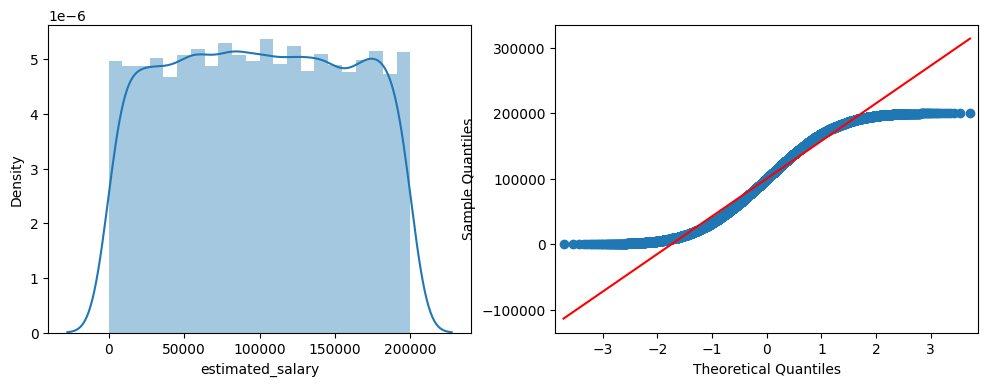


Shapiro-Wilk Test: stat = 0.957, p = 0.0
Данные не распределены нормально

D'Agostino Test: stat = 7397.15, p = 0.0
Данные не распределены нормально


In [41]:
norm_test(df['estimated_salary'])

Данные не подходят под нормальное распределение. Поэтому воспользуемся критерием Манна-Уитни,поскольку он не требует нормального распределения выборок.

H_0: Доходы отточных клиентов и оставшихся, не различается.  
H_1: Выводы о разнице доходов отточных клиентов и оставшихся, сделать нельзя.

alpha = 0.05

In [42]:
alpha = .05

df_non_churn = df.query('churn==False')
df_churn = df.query('churn==True')

In [43]:
stat, p = stats.mannwhitneyu(df_non_churn['estimated_salary'], df_churn['estimated_salary'])

print(f'Stat = {stat:.3}, p = {p:.3}')
if p > alpha:
    print("Отвергаем нулевую гипотезу. Разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вывод о разнице сделать нельзя")

Stat = 7.97e+06, p = 0.227
Отвергаем нулевую гипотезу. Разница статистически значима


Гипотезу можно отвергать, разница в доходах есть!

#### <a id='toc1_1_7_2_'></a>[Проверка гипотезы о различиях `кредитного рейтинга` между теми клиентами, которые ушли и теми, которые остались](#toc0_)
Для начала проведем проверку на нормальность

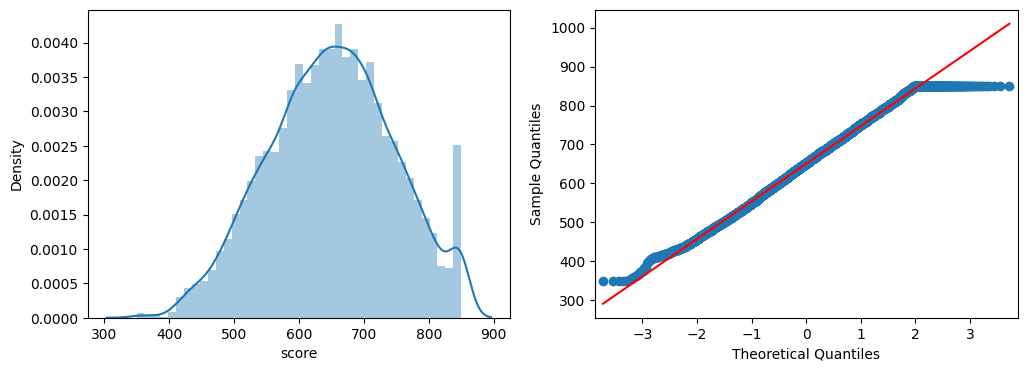


Shapiro-Wilk Test: stat = 0.994, p = 3.49e-20
Данные не распределены нормально

D'Agostino Test: stat = 132.828, p = 0.0
Данные не распределены нормально


In [44]:
norm_test(df['score'])

Снова данные не подходят под нормальное распределение. В этот раз нормализуем данные с помощью бутстрапирования и проведем стат. тест Стьюдента.

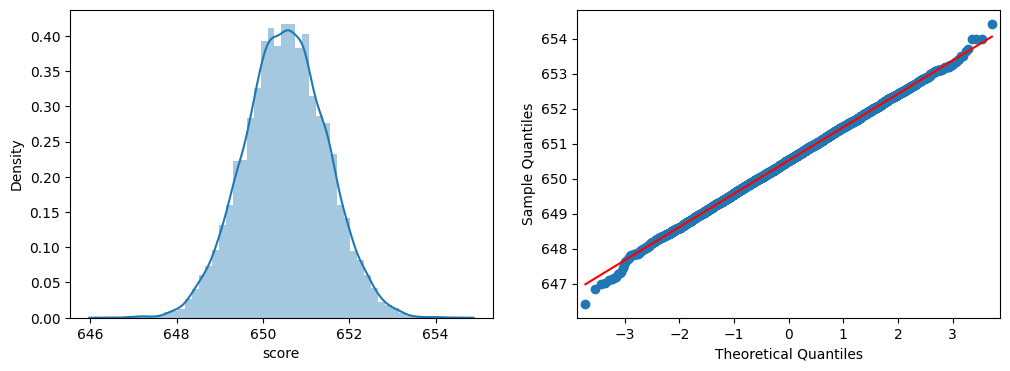


Shapiro-Wilk Test: stat = 1.0, p = 0.369
Данные распределены нормально

D'Agostino Test: stat = 1.313, p = 0.519
Данные распределены нормально


In [45]:
# b = df['score']
# xs = [b.sample(len(b), replace=True).mean() for _ in range(10000)] 

df_boot = df.copy()
df_boot['score'] = [df_boot['score'].sample(len(df_boot['score']), replace=True).mean() for _ in range(10000)]
norm_test(df_boot['score'])


H_0: Кредитный рейтинг отточных клиентов и оставшихся, не различается.  
H_1: Выводы о разнице кредитного рейтинга отточных клиентов и оставшихся, сделать нельзя.

alpha = 0.05

In [46]:
df_non_churn = df_boot.query('churn==False')
df_churn = df_boot.query('churn==True')

In [47]:
stat, p = stats.ttest_ind(df_non_churn['score'], df_churn['score'])

print(f'Stat = {stat:.3}, p = {p:.3}')
if p > alpha:
    print("Отвергаем нулевую гипотезу. Разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вывод о разнице сделать нельзя")

Stat = 0.196, p = 0.845
Отвергаем нулевую гипотезу. Разница статистически значима


Гипотезу можно отвергать, разница в кредитных рейтингах есть!

### <a id='toc1_1_8_'></a>[Выводы и рекомендации](#toc0_)

Проведя анализ найти точно ответа на пропуски в поле `balance` не вышло но можно предположить следующие причины их появления:
- техническая ошибка при заполнение данных или при выгрузке
- возможно это поле показывает отрицательный баланс на счете
- возможно эти клиенты были перенесены из старой базы

По таблице корреляций и графикам распределения, были выделены следующие важные для ответа на главный вопрос поля:
- `city`
- `gender`
- `balance`
- `loyalty`
- `age`
- `products` 

Остальные поля либо вообще не влияют на основное исследование, либо их влияние сильно ниже описанного выше.

Все отточные категории можно разделить 2 группы, с явным/сильным влиянием на отток пользователей (на них нужно обратить внимание в первую очередь) и категории в которых отток меньше но прорабатывать их нужно.

Группа с главными категориями:  

1) Не зависимо от `города, лояльности, баланса и количества продуктов` самой проблемной категорией являются 
   - клиенты в возрасте` 45 - 64 года`
   - `женщины` в не зависимости от возраста
2) Следом идут клиенты из `Ростова Великого`:
   - как `женщины` так и `мужчины `
   - начиная `с 25 до 64 лет`
3) Не лояльные клиенты во всех категориях уходят в 2 раза чаще (очевидная группа)

И группы с второстепенными категориями:

4) Отток клиентов `по кол-ву продуктов` (скорее всего прямая зависимость от `лояльности`):
   - клиенты с 1 продуктом 
5) Клиенты со `вкладами` меньше 50к (скорее всего прямая зависимость от `лояльности`)


Так же проведя стат.тесты было выяснено:
- Разница в доходах у отточных и оставшихся к клиентов `ЕСТЬ`
- Разница в кредитном рейтинге у отточных и оставшихся к клиентов `ЕСТЬ`

**Рекомендации**

`По 1 категории` отточных пользователей:
- увеличить кэшбэк на товары для женщин и родителей подростков
- сделать "копилку" для пользования после выхода на пенсию
- увеличить количество "акций" и маркетинговых калабораций направленных на клиентов женского пола

`По 2 категории`:
- провести аудит качества продукта в г. Ростов Великий
- усилить связи с другими компаниями из этого региона (напрм. маркетинговые)
- взаимодействовать с молодыми (возраст от 25 лет) клиентами через выгодные кредиты (молодым семьям)

`По 4 категории`: 
- сделать более выгодные предложения на открытия второго продукта
- напрм. "первый месяц без комиссии в продуктах связанных с ценными бумагами"
- включить в общую "экосистему" банка уже существующие другие банковские продукты

`По 5 категории`:
- увеличивать процент на остаток средств на счете в зависимости от увеличения баланса
- убрать комиссию за обслуживание счета при достижении определенной суммы
- добавить возможность хранить зарубежные валюты

`По 3 категории` каких-то конкретных рекомендаций дать сложно, но можно сказать что все выше сказанное косвенно влияет на этот параметр.